In [1]:
# Import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

# Set figure stile and size for entire notebook
sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (7,4)


In [2]:
# Import Data

#data = pd.read_csv('data/data_prep_reg.csv', index_col=[0])
data = pd.read_csv('data/data_prep_feat.csv', index_col=[0])

print(f'Data: {data.shape}')


Data: (4990, 770)


In [3]:
#fillna
data = data.fillna(data.mean())

In [4]:
data.head()

,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,...,newrel_humidity119,newwind_dir119,windspeed119,atmospherepressure119,newtemp120,newprecip120,newrel_humidity120,newwind_dir120,windspeed120,atmospherepressure120
1,3,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,...,0.649250,73.528733,1.475833,90.439167,21.450000,0.561,0.797333,296.967254,1.019167,90.529167
10,3,55.638261,34.041667,17.191667,23.189507,4.432786,19.649595,22.033333,16.850000,10.302,...,0.759167,178.252679,0.896736,90.555833,20.491667,0.000,0.779958,177.704952,0.897390,90.531667
13,3,32.240851,29.608333,19.166667,23.151446,2.808773,7.889204,22.291667,10.441667,2.229,...,0.786333,101.535318,1.511667,90.554167,22.083333,2.229,0.915818,331.308648,1.970000,90.527500
15,3,72.717021,29.133333,17.516667,22.341529,3.161073,9.992384,21.683333,11.616667,13.588,...,0.871250,270.524749,0.454167,90.512500,19.716667,0.000,0.905083,231.191039,0.388333,90.477500
22,3,35.833571,30.558333,16.983333,22.401240,3.592899,12.908921,21.333333,13.575000,43.080,...,0.666833,178.252679,0.896736,90.239167,26.850000,0.000,0.642583,177.704952,0.897390,90.217500


In [5]:
columns_to_drop = ['target', 'location']
# define features and target
X = data.drop(columns_to_drop, axis=1)
y = data.target

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = 100) 

print (f'X: {X.shape}')
print (f'y: {y.shape}')

print (f'X_train: {X_train.shape}')
print (f'y_train: {y_train.shape}')

print (f'X_test: {X_test.shape}')
print (f'y_test: {y_test.shape}')

X: (4990, 768)
y: (4990,)
X_train: (3493, 768)
y_train: (3493,)
X_test: (1497, 768)
y_test: (1497,)


## Linear Regression

In [6]:
# Scaling with standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Instantiate our model 
lin_reg = LinearRegression()
lin_reg_scaled = LinearRegression()
# Train the model using our data
lin_reg.fit(X_train, y_train)
lin_reg_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [8]:
# predict

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

y_pred_train_scaled = lin_reg_scaled.predict(X_train_scaled)
y_pred_test_scaled = lin_reg_scaled.predict(X_test_scaled)

In [9]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    #ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    #ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

In [10]:
rsme_lin_reg_train = rmse(y_train, y_pred_train )
rsme_lin_reg_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_lin_reg_train:.2f}')
print(f'RSME _ test: {rsme_lin_reg_test:.2f}')

rsme_lin_reg_train_scaled = rmse(y_train, y_pred_train_scaled )
rsme_lin_reg_test_scaled = rmse(y_test, y_pred_test_scaled )

print(f'RSME _ train_scaled: {rsme_lin_reg_train_scaled:.2f}')
print(f'RSME _ test_scaled: {rsme_lin_reg_test_scaled:.2f}')

RSME _ train: 19.95
RSME _ test: 26.53
RSME _ train_scaled: 19.99
RSME _ test_scaled: 26.58


In [11]:
print(f' max coef: {max(lin_reg.coef_)}')
print(f' min coef: {min(abs(lin_reg.coef_))}')

 max coef: 86097368912.41986
 min coef: 5.817413330078125e-05


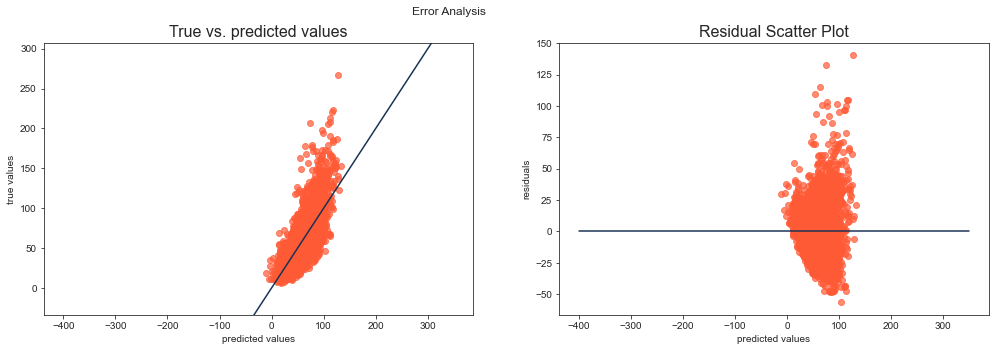

In [12]:
# error analysis train:
error_analysis(y_train, y_pred_train)

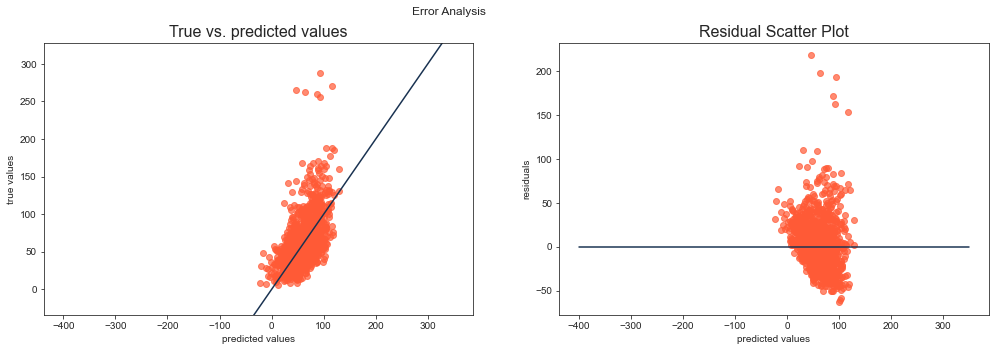

In [13]:
# error analysis test:
error_analysis(y_test, y_pred_test)

### Lasso


RSME _ train: 24.41
RSME _ test: 27.46


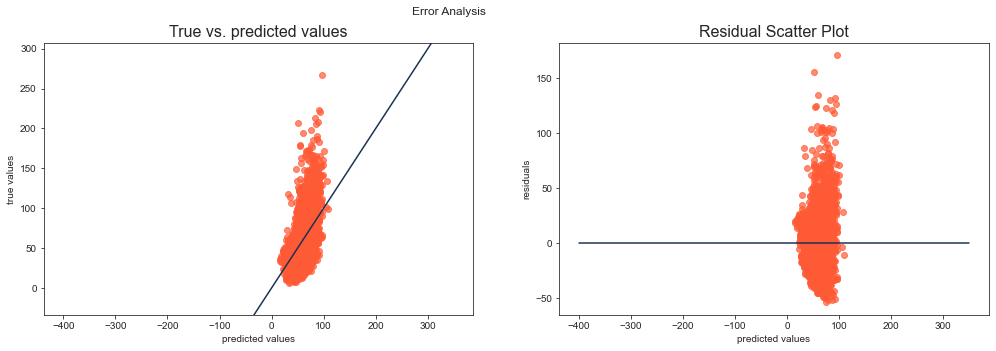

In [14]:
from sklearn.linear_model import Lasso

# Instantiate our model 
lasso_reg = Lasso()

# Train the model using our data
lasso_reg.fit(X_train, y_train)

# predict

y_pred_train = lasso_reg.predict(X_train)
y_pred_test = lasso_reg.predict(X_test)

rsme_lasso_reg_train = rmse(y_train, y_pred_train)
rsme_lasso_reg_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_lasso_reg_train:.2f}')
print(f'RSME _ test: {rsme_lasso_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)


In [15]:
print(f' max coef: {max(lasso_reg.coef_)}')
print(f' min coef: {min(lasso_reg.coef_)}')

 max coef: 6.826570938124945
 min coef: -6.308100130839097


### Ridge


RSME _ train: 20.51
RSME _ test: 26.62


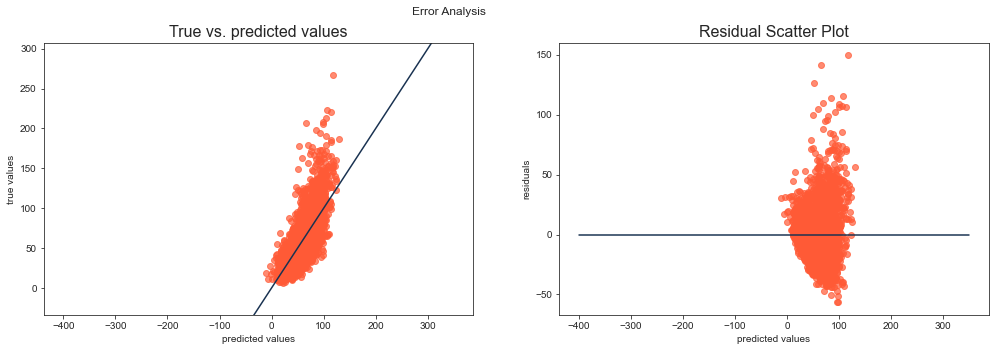

In [16]:
from sklearn.linear_model import Ridge

# Instantiate our model 
ridge_reg = Ridge()

# Train the model using our data
ridge_reg.fit(X_train, y_train)

# predict

y_pred_train = ridge_reg.predict(X_train)
y_pred_test = ridge_reg.predict(X_test)

rsme_ridge_reg_train = rmse(y_train, y_pred_train)
rsme_ridge_reg_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_ridge_reg_train:.2f}')
print(f'RSME _ test: {rsme_ridge_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)

### linear Regression on log y

In [17]:
y_log = np.log1p(y_train)


In [18]:
y_pred_train

array([44.84665615, 55.29044967, 81.58975408, ..., 64.92150387,
       36.58578476, 58.91002883])

RSME _ train: 20.04
RSME _ test: 25.83


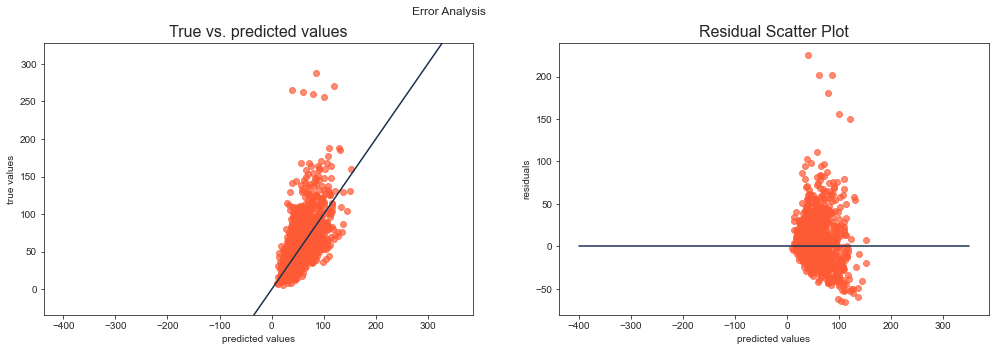

In [19]:
# Instantiate our model 
lin_log_reg = LinearRegression()

# Train the model using our data
lin_log_reg.fit(X_train, y_log) # y´= log(y+1)

# predict

y_pred_train_log = lin_log_reg.predict(X_train) # y = exp(y´) - 1
y_pred_train = np.expm1(y_pred_train_log)
y_pred_test_log = lin_log_reg.predict(X_test)
y_pred_test = np.expm1(y_pred_test_log)


rsme_lin_log_reg_train = rmse(y_train, y_pred_train )
rsme_lin_log_reg_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_lin_log_reg_train:.2f}')
print(f'RSME _ test: {rsme_lin_log_reg_test:.2f}')

# error analysis test:
error_analysis(y_test, y_pred_test)

# EDA on features

In [20]:
data.head()

,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,...,newrel_humidity119,newwind_dir119,windspeed119,atmospherepressure119,newtemp120,newprecip120,newrel_humidity120,newwind_dir120,windspeed120,atmospherepressure120
1,3,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,...,0.649250,73.528733,1.475833,90.439167,21.450000,0.561,0.797333,296.967254,1.019167,90.529167
10,3,55.638261,34.041667,17.191667,23.189507,4.432786,19.649595,22.033333,16.850000,10.302,...,0.759167,178.252679,0.896736,90.555833,20.491667,0.000,0.779958,177.704952,0.897390,90.531667
13,3,32.240851,29.608333,19.166667,23.151446,2.808773,7.889204,22.291667,10.441667,2.229,...,0.786333,101.535318,1.511667,90.554167,22.083333,2.229,0.915818,331.308648,1.970000,90.527500
15,3,72.717021,29.133333,17.516667,22.341529,3.161073,9.992384,21.683333,11.616667,13.588,...,0.871250,270.524749,0.454167,90.512500,19.716667,0.000,0.905083,231.191039,0.388333,90.477500
22,3,35.833571,30.558333,16.983333,22.401240,3.592899,12.908921,21.333333,13.575000,43.080,...,0.666833,178.252679,0.896736,90.239167,26.850000,0.000,0.642583,177.704952,0.897390,90.217500


In [21]:
"""for i, col in enumerate(train.columns):
    plt.figure()
    sns.histplot(data = train, x = col)"""

'for i, col in enumerate(train.columns):\n    plt.figure()\n    sns.histplot(data = train, x = col)'

convert precip to log

In [22]:
#train['log_mean_precip'] = train['mean_precip'].apply(np.log1p)	

In [23]:
#sns.histplot(data = data, x='log_mean_precip')

### linreg with log_mean_precip instead of mean_prec

In [ ]:
columns_to_drop = ['target', 'mean_precip']
# define features and target
X = train.drop(columns_to_drop, axis=1)
y = train.target

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = 100) 

print (f'X: {X.shape}')
print (f'y: {y.shape}')

print (f'X_train: {X_train.shape}')
print (f'y_train: {y_train.shape}')

print (f'X_test: {X_test.shape}')
print (f'y_test: {y_test.shape}')

In [ ]:
X_train.head()

In [ ]:

# Instantiate our model 
lin_reg = LinearRegression()

# Train the model using our data
lin_reg.fit(X_train, y_train)


# predict

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# RSME
rsme_lin_reg_train = rmse(y_train, y_pred_train )
rsme_lin_reg_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_lin_reg_train:.2f}')
print(f'RSME _ test: {rsme_lin_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)

### linear regression with cat precipitation

In [ ]:
# data preprocessing: 
train.head()

In [ ]:
def rain(x):
    if x == 0: return 0
    else: return 1

train['rain'] = train['mean_precip'].apply(lambda x : rain(x))
train.head()

In [ ]:
columns_to_drop = ['target', 'mean_precip', 'log_mean_precip']
# define features and target
X = train.drop(columns_to_drop, axis=1)
y = train.target

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = 100) 

print (f'X: {X.shape}')
print (f'y: {y.shape}')

print (f'X_train: {X_train.shape}')
print (f'y_train: {y_train.shape}')

print (f'X_test: {X_test.shape}')
print (f'y_test: {y_test.shape}')

In [ ]:
X_train.head()

In [ ]:

# Instantiate our model 
lin_reg = LinearRegression()

# Train the model using our data
lin_reg.fit(X_train, y_train)


# predict

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# RSME
rsme_lin_reg_train = rmse(y_train, y_pred_train )
rsme_lin_reg_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_lin_reg_train:.2f}')
print(f'RSME _ test: {rsme_lin_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)

In [ ]:
### lasso 

In [ ]:
from sklearn.linear_model import Lasso

# Instantiate our model 
lasso_reg = Lasso()

# Train the model using our data
lasso_reg.fit(X_train, y_train)

# predict

y_pred_train = lasso_reg.predict(X_train)
y_pred_test = lasso_reg.predict(X_test)

rsme_lasso_reg_train = rmse(y_train, y_pred_train)
rsme_lasso_reg_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_lasso_reg_train:.2f}')
print(f'RSME _ test: {rsme_lasso_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)
